In [1]:
import os
import geopandas as gpd
import pandas as pd
from shapely.wkt import loads
import matplotlib as plt
import numpy as np

In [2]:
# import data
current_dir = os.getcwd()

# Construct the path to the 'data' directory relative to the current directory
data_dir = os.path.join(current_dir, '..', 'data')

# Access a specific file
df = pd.read_csv(os.path.join(data_dir, 'Infravelo+Location.csv'), low_memory = False)

In [3]:
df.head()

,id,title,link,district,type,name,value,function,location
0,9080038002,A-Schweitzer-Gymnasium Gymnasium,https://www.infravelo.de/projekt/a-schweitzer-...,Neukölln,Anlehnbügel,Anzahl Stellplätze,30,parking,NaN
1,9100031042,Adorfer Straße 8,https://www.infravelo.de/projekt/adorfer-stras...,Marzahn-Hellersdorf,Anlehnbügel,Anzahl Stellplätze,6,parking,POINT (52.5320026 13.6072718)
2,9060111001,Albrechtstraße 49,https://www.infravelo.de/projekt/albrechtstras...,Steglitz-Zehlendorf,Anlehnbügel,Anzahl Stellplätze,4,parking,POINT (52.4483762 13.3391646)
3,9060092029,Albrechtstraße 81,https://www.infravelo.de/projekt/albrechtstras...,Steglitz-Zehlendorf,Anlehnbügel,Anzahl Stellplätze,16,parking,POINT (52.4494241 13.3384682)
4,9100031023,Alfred-Döblin-Straße 2 A,https://www.infravelo.de/projekt/alfred-doebli...,Marzahn-Hellersdorf,Anlehnbügel,Anzahl Stellplätze,8,parking,POINT (52.5521667 13.5512789)


In [4]:
# remove all rows where there's no location info
df = df[df["location"].notnull()]

In [5]:
df['type'].value_counts()

type
Anlehnbügel                     1481
Baulich getrennter Radweg         27
Geschützter Radfahrstreifen       26
Lastenfahrradbügel                24
Radfahrstreifen                   23
Grüner Seitenstreifen             23
Mischverkehr                      16
Fahrradstraße                     12
Schutzstreifen                    12
Fahrradbox                         9
Gemeinsamer Geh- und Radweg        5
Kinderfahrradbügel                 4
Temporäre Radfahrstreifen          3
Zweirichtungsradweg                3
Sonderweg                          2
Querungshilfe                      2
Verkehrsbeschilderung              2
Vorderradhalter Rahmen/Gabel       1
Radwegrampe                        1
Bussonderfahrstreifen              1
Name: count, dtype: int64

In [6]:
# filter only parking
parking_type = ["Anlehnbügel", "Lastenfahrradbügel", "Fahrradbox", "Kinderfahrradbügel", "Vorderradhalter Rahmen/Gabel"]
df = df[df["type"].isin(parking_type)]

In [7]:
# transform to geopandas format to display
df['location'] = df['location'].apply(loads)
df = df.rename(columns={'location': 'geometry'})
df.head()

,id,title,link,district,type,name,value,function,geometry
1,9100031042,Adorfer Straße 8,https://www.infravelo.de/projekt/adorfer-stras...,Marzahn-Hellersdorf,Anlehnbügel,Anzahl Stellplätze,6,parking,POINT (52.5320026 13.6072718)
2,9060111001,Albrechtstraße 49,https://www.infravelo.de/projekt/albrechtstras...,Steglitz-Zehlendorf,Anlehnbügel,Anzahl Stellplätze,4,parking,POINT (52.4483762 13.3391646)
3,9060092029,Albrechtstraße 81,https://www.infravelo.de/projekt/albrechtstras...,Steglitz-Zehlendorf,Anlehnbügel,Anzahl Stellplätze,16,parking,POINT (52.4494241 13.3384682)
4,9100031023,Alfred-Döblin-Straße 2 A,https://www.infravelo.de/projekt/alfred-doebli...,Marzahn-Hellersdorf,Anlehnbügel,Anzahl Stellplätze,8,parking,POINT (52.5521667 13.5512789)
6,9100031051,Allee der Kosmonauten 79,https://www.infravelo.de/projekt/allee-der-kos...,Marzahn-Hellersdorf,Anlehnbügel,Anzahl Stellplätze,8,parking,POINT (52.5279046 13.5460889)


In [8]:
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')

<Axes: >

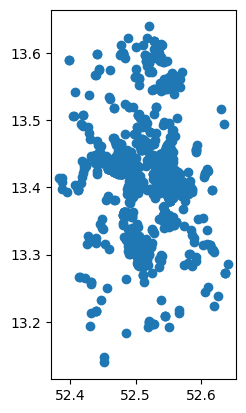

In [9]:
gdf.plot()

In [10]:
df.to_csv("Parking_Location.csv", index = False)